In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [ ]:
# ! kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs
# # If using commnad prompt as terminal
# ! tar -xf price-volume-data-for-all-us-stocks-etfs.zip
# # If using LINUX system terminal
# ! unzip -n price-volume-data-for-all-us-stocks-etfs.zip

# Data Exploration

In [16]:
files_with_na = []

print("---------------------------- Checking ETFs data ----------------------------------")
for file in os.listdir("ETFs"):
    try:
        df = pd.read_table(f'ETFs/{file}', sep = ",")
        na_count = df.isnull().any()
        if sum(na_count) > 0:
          files_with_na.append(file)
    except:
      print(f"Problem reading file: {file}")

print("---------------------------- Checking Stocks data ----------------------------------")
for file in os.listdir("Stocks"):
    try:
      df = pd.read_table(f'Stocks/{file}', sep = ",")
      na_count = df.isnull().any()
      if sum(na_count) > 0:
        files_with_na.append(file)
    except:
      print(f"Problem reading file: {file}")
    
print(f"Files that contains NA value: {files_with_na}")
# Turns out these files that can't be read are actually blank

---------------------------- Checking ETFs data ----------------------------------
---------------------------- Checking ETFs data ----------------------------------
Problem reading file: accp.us.txt
Problem reading file: amrh.us.txt
Problem reading file: amrhw.us.txt
Problem reading file: asns.us.txt
Problem reading file: bbrx.us.txt
Problem reading file: bolt.us.txt
Problem reading file: boxl.us.txt
Problem reading file: bxg.us.txt
Problem reading file: ehr.us.txt
Problem reading file: fmax.us.txt
Problem reading file: gnst.us.txt
Problem reading file: hayu.us.txt
Problem reading file: jt.us.txt
Problem reading file: mapi.us.txt
Problem reading file: molc.us.txt
Problem reading file: otg.us.txt
Problem reading file: pbio.us.txt
Problem reading file: pxus.us.txt
Problem reading file: rbio.us.txt
Problem reading file: sail.us.txt
Problem reading file: sbt.us.txt
Problem reading file: scci.us.txt
Problem reading file: scph.us.txt
Problem reading file: send.us.txt
Problem reading file: s

In [2]:
# Integrating Brian's Method Decided to eliminate all file under 7000 bytes\

# # Command Prompt Command
# ! Get-ChildItem -Path "Data/Stocks" -Recurse | Where-Object {
#     $_.Length -gt 7000 -and $_.Length -lt 10000
# } | Remove-Item
# Linux Command 
! find Data/Stocks -size -7000c -delete

In [123]:
a = pd.read_table("Stocks/a.us.txt", sep = ",")
print(a.describe())
a

              Open         High          Low        Close        Volume  \
count  4521.000000  4521.000000  4521.000000  4521.000000  4.521000e+03   
mean     27.856296    28.270442    27.452486    27.871357  3.993503e+06   
std      12.940880    13.176000    12.711735    12.944389  2.665730e+06   
min       7.223100     7.513900     7.087800     7.323800  0.000000e+00   
25%      19.117000    19.435000    18.780000    19.089000  2.407862e+06   
50%      24.456000    24.809000    24.159000    24.490000  3.460621e+06   
75%      36.502000    37.046000    35.877000    36.521000  4.849809e+06   
max     105.300000   109.370000    97.881000   107.320000  6.627751e+07   

       OpenInt  
count   4521.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  


,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...,...
4516,2017-11-06,68.220,68.450,68.220,68.220,995731,0
4517,2017-11-07,68.320,68.640,68.040,68.250,966466,0
4518,2017-11-08,68.100,68.330,67.771,68.110,972616,0
4519,2017-11-09,67.920,67.980,66.910,67.470,1673083,0


In [4]:
weekday = {}
for date in a["Date"]:
    wd = pd.to_datetime(date).weekday()
    weekday[wd] = weekday.get(wd, 0) + 1
weekday

In [7]:
start_year = {}
for file in os.listdir("ETFs"):
    df = pd.read_table(f'ETFs/{file}', sep = ",")
    date = datetime.strptime(df["Date"][0], "%Y-%m-%d").year
    start_year[date] = start_year.get(date, 0) + 1
start_year

{2010: 107,
 2008: 102,
 2012: 92,
 2015: 57,
 2011: 141,
 2005: 193,
 2013: 122,
 2007: 175,
 2014: 117,
 2009: 87,
 2016: 14,
 2017: 23,
 2006: 113,
 1999: 1}

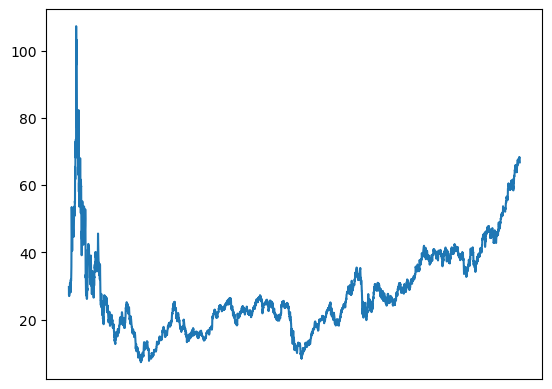

In [21]:
plt.plot(a["Date"], a["Close"])
plt.xticks([])
plt.show()

In [75]:
print(a["Date"])

0       1999-11-18
1       1999-11-19
2       1999-11-22
3       1999-11-23
4       1999-11-24
           ...    
4516    2017-11-06
4517    2017-11-07
4518    2017-11-08
4519    2017-11-09
4520    2017-11-10
Name: Date, Length: 4521, dtype: object


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

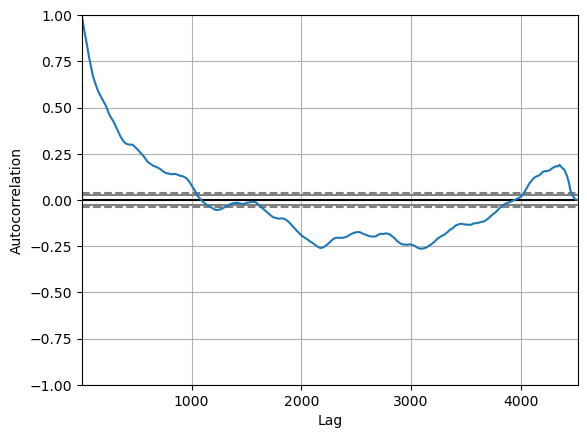

In [74]:
pd.plotting.autocorrelation_plot(a["Close"])

# Data Modelling (Using ARIMA)

In [132]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer, FourierFeaturizer
import pickle

In [125]:
data = a[["Date", "Close"]]
train, test = train_test_split(data, test_size = 200)

In [126]:
# pipe = Pipeline([
#     ("fourier",FourierFeaturizer(m =12)),
#     ("arima", pm.arima.AutoARIMA(stepwise = True,  trace=1, error_action="ignore",
#                               seasonal = True,  
#                               suppress_warnings=True))    
# ])
# pipe.fit(train["Close"])

# # Dump it into the pickle file after fitting so don't need run everytime
# with open('arima.pkl', 'wb') as pkl:
#     pickle.dump(pipe, pkl)


In [133]:
with open('arima.pkl', 'rb') as pkl:
    pipe = pickle.load(pkl)

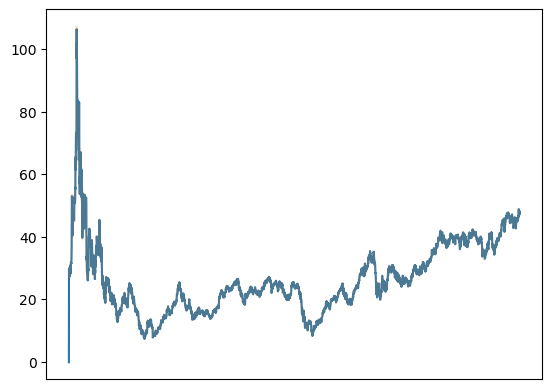

In [134]:
pred = pipe.predict_in_sample()
plt.plot(train["Date"], pred)
plt.plot(train["Date"], train["Close"], alpha = .2)
plt.xticks([])
plt.show()

4321


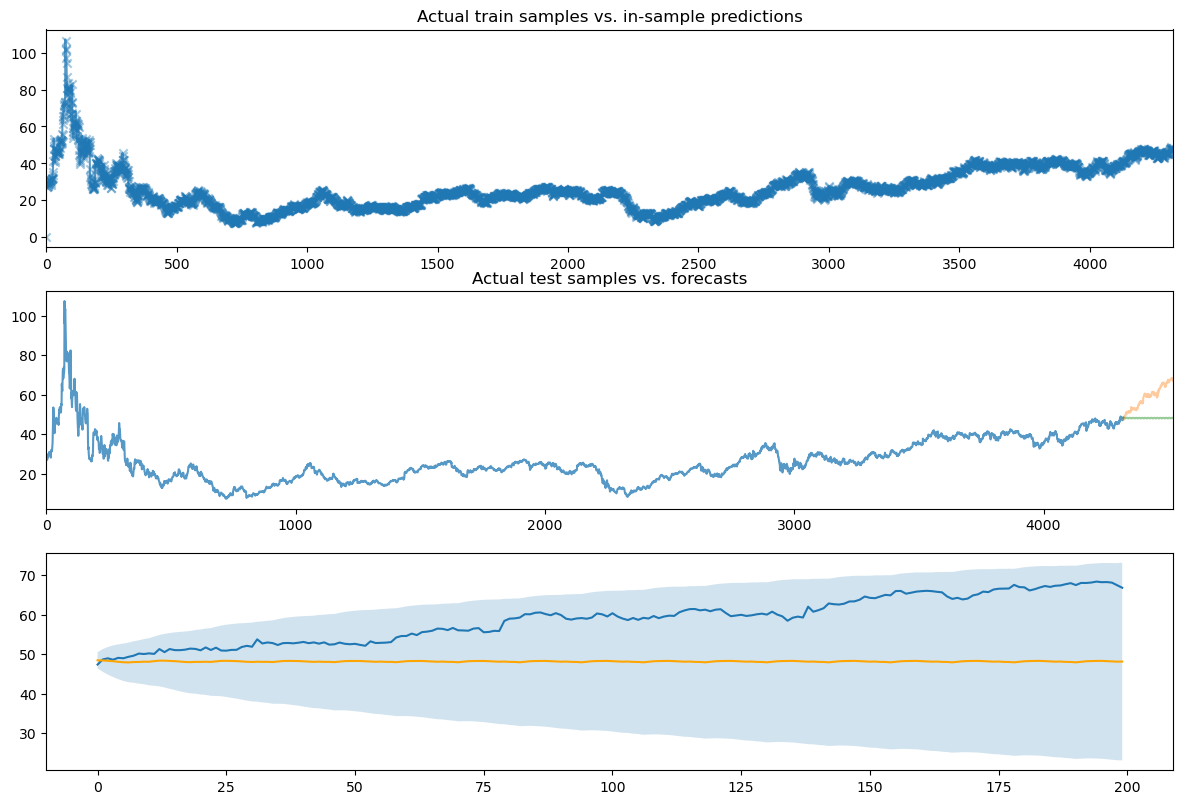

In [138]:
# Prediction
preds, conf_int = pipe.predict(n_periods=len(test), return_conf_int=True)


fig, axes = plt.subplots(3, 1, figsize=(12, 8))
fig.tight_layout()

# Visualize goodness of fit
in_sample_preds, in_sample_confint = pipe.predict_in_sample(X=None, return_conf_int=True)

print(len(in_sample_preds))
n_train = train.shape[0]
x0 = np.arange(n_train)
axes[0].plot(x0, train["Close"], alpha=0.75)
axes[0].scatter(x0, in_sample_preds, alpha=0.4, marker='x')
# axes[0].fill_between(x0, in_sample_confint[:, 0], in_sample_confint[:, 1],
#                      alpha=0.1, color='b')
axes[0].set_title('Actual train samples vs. in-sample predictions')
axes[0].set_xlim((0, x0.shape[0]))

# Visualize actual + predicted
x1 = np.arange(n_train + preds.shape[0])
axes[1].plot(x1[:n_train], train["Close"], alpha=0.75)
axes[1].plot(x1[n_train:], preds, alpha=0.4, color = "green")
axes[1].plot(x1[n_train:], test["Close"][:preds.shape[0]], alpha=0.4)
# axes[1].fill_between(x1[n_train:], conf_int[:, 0], conf_int[:, 1],
#                      alpha=0.1, color='b')
axes[1].set_title('Actual test samples vs. forecasts')
axes[1].set_xlim((0, data.shape[0]))


x2 = np.arange(len(test))
axes[2].plot(x2, test["Close"])
axes[2].plot(x2, preds, c = "orange")
axes[2].fill_between(x2, conf_int[:, 0], conf_int[:, 1], alpha = .2)
plt.show()

# We can seee from the results from ARIMA that the short term relationship are more closely following the trend but as it 
# gets further away, the prediction variance starting to become larger and the trend starting to deflect from the real time
# value

# Arima also tends to show a smooth curve as it only reflects the trend of it